In [1]:
! pip install autogen

Defaulting to user installation because normal site-packages is not writeable


In [2]:
! python -m pip install autogen yfinance matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [3]:
! pip install --upgrade paramiko cryptography

Defaulting to user installation because normal site-packages is not writeable


In [4]:
! pip install --upgrade pyopenssl

Defaulting to user installation because normal site-packages is not writeable


In [5]:
! pip uninstall openai -y

Found existing installation: openai 1.66.3
Uninstalling openai-1.66.3:
  Successfully uninstalled openai-1.66.3


In [6]:
! pip install openai==1.3.5


Defaulting to user installation because normal site-packages is not writeable
  Using cached openai-1.3.5-py3-none-any.whl.metadata (16 kB)
Using cached openai-1.3.5-py3-none-any.whl (220 kB)


In [7]:
!pip uninstall openai autogen -y

Found existing installation: openai 1.3.5
Uninstalling openai-1.3.5:
  Successfully uninstalled openai-1.3.5
Found existing installation: autogen 0.8.2
Uninstalling autogen-0.8.2:
  Successfully uninstalled autogen-0.8.2


In [8]:
!pip install openai==1.3.7 autogen==0.8.2

Defaulting to user installation because normal site-packages is not writeable
  Using cached openai-1.3.7-py3-none-any.whl.metadata (17 kB)
  Using cached autogen-0.8.2-py3-none-any.whl.metadata (19 kB)
Using cached openai-1.3.7-py3-none-any.whl (221 kB)
Using cached autogen-0.8.2-py3-none-any.whl (12 kB)


In [9]:
! pip show openai autogen

Name: openai
Version: 1.3.7
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: 
---
Name: autogen
Version: 0.8.2
Summary: Alias package for pyautogen
Home-page: https://github.com/ag2ai/ag2
Author: Chi Wang & Qingyun Wu
Author-email: support@ag2.ai
License: Apache Software License 2.0
Location: C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages
Requires: pyautogen
Required-by: 


In [10]:
!pip install --upgrade openai autogen

Defaulting to user installation because normal site-packages is not writeable
  Using cached openai-1.66.3-py3-none-any.whl.metadata (25 kB)
Using cached openai-1.66.3-py3-none-any.whl (567 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.3.7
    Uninstalling openai-1.3.7:
      Successfully uninstalled openai-1.3.7


In [6]:
import autogen
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
# Define the agent
class StockAgent:
    def __init__(self):
        self.agent = autogen.AssistantAgent("Stock Assistant")
    
    def fetch_stock_data(self, ticker):
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(period="1mo")
            if hist.empty:
                print("No data found for the given ticker.")
                return None
            return hist
        except Exception as e:
            print(f"Error fetching stock data: {e}")
            return None
    
    def plot_stock_data(self, hist, ticker):
        if hist is not None:
            plt.figure(figsize=(10, 5))
            plt.plot(hist.index, hist['Close'], label=f'{ticker} Closing Prices')
            plt.xlabel('Date')
            plt.ylabel('Price (USD)')
            plt.title(f'{ticker} Stock Prices Over Last Month')
            plt.legend()
            plt.show()
    
    def process_query(self):
        ticker = input("Enter stock ticker symbol (e.g., AAPL): ").strip().upper()
        print(f"Fetching data for {ticker}...")
        hist = self.fetch_stock_data(ticker)
        self.plot_stock_data(hist, ticker)


Enter stock ticker symbol (e.g., AAPL):  AAPL


Fetching data for AAPL...


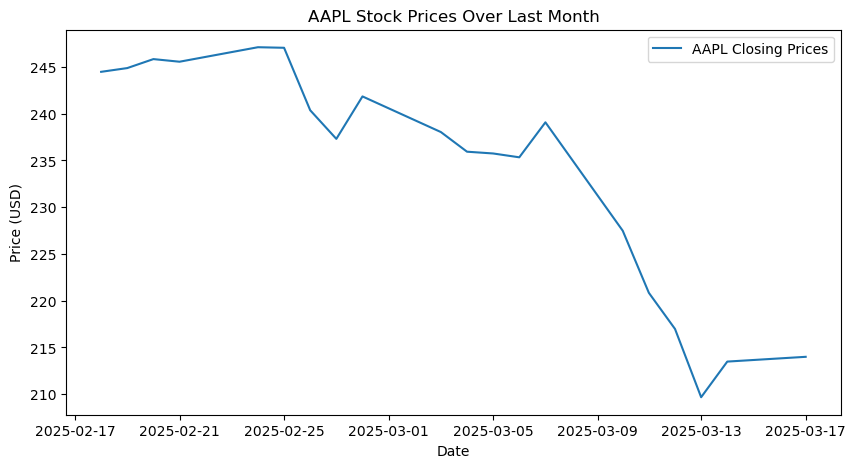

In [8]:
# Example usage
if __name__ == "__main__":
    agent = StockAgent()
    agent.process_query()